In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df=pd.read_csv("Temperature_IceCream_SVR_Dataset.csv")

In [3]:
df

,Temperature_C,IceCream_Sales
0,10.00,92.76
1,10.77,115.85
2,11.54,139.16
3,12.31,118.68
4,13.08,150.39
5,13.85,169.30
6,14.62,180.39
7,15.38,181.66
8,16.15,199.09
9,16.92,212.69


In [5]:
df.columns

Index(['Temperature_C', 'IceCream_Sales'], dtype='object')

In [6]:
x=df[['Temperature_C']]
y=df['IceCream_Sales']

   Temperature_C  IceCream_Sales
0          10.00           92.76
1          10.77          115.85
2          11.54          139.16
3          12.31          118.68
4          13.08          150.39
MSE: 85.87325787474713
R²: 0.9944282086382312


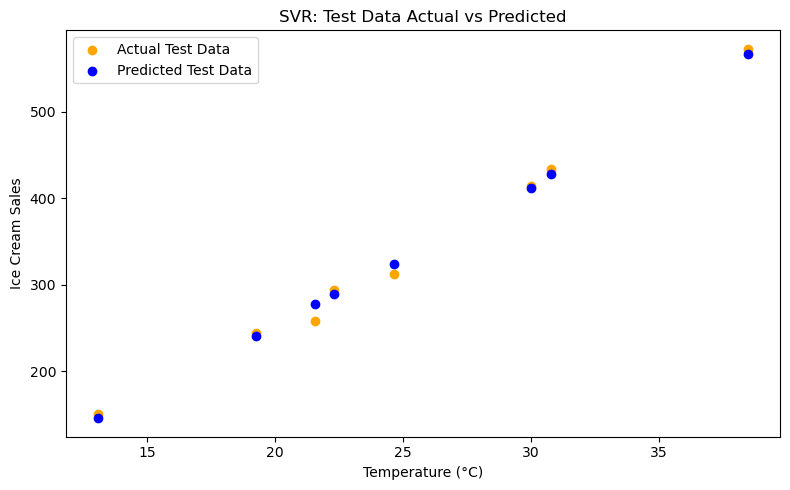

Predicted Ice Cream Sales at 30°C: 412.24


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

# 1. Load dataset
df = pd.read_csv("Temperature_IceCream_SVR_Dataset.csv")
print(df.head())

# 2. Split into X and y
X = df[["Temperature_C"]].values
y = df["IceCream_Sales"].values

# 3. Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Scaling
sc_X = StandardScaler()
sc_y = StandardScaler()

# Fit on training data ONLY (VERY IMPORTANT)
X_train_scaled = sc_X.fit_transform(X_train)
y_train_scaled = sc_y.fit_transform(y_train.reshape(-1, 1)).ravel()

# Transform test data using same scaler
X_test_scaled = sc_X.transform(X_test)

# 5. Train SVR model
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train_scaled, y_train_scaled)

# 6. Predict on test data
y_pred_scaled = svr_model.predict(X_test_scaled)
y_pred = sc_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()

# 7. Model evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("MSE:", mse)
print("R²:", r2)

# 8. Plot predictions vs actual values
plt.figure(figsize=(8,5))
plt.scatter(X_test, y_test, color="orange", label="Actual Test Data")
plt.scatter(X_test, y_pred, color="blue", label="Predicted Test Data")
plt.xlabel("Temperature (°C)")
plt.ylabel("Ice Cream Sales")
plt.title("SVR: Test Data Actual vs Predicted")
plt.legend()
plt.tight_layout()
plt.show()

# 9. Predict for new temperature
temp = np.array([[30]])
temp_scaled = sc_X.transform(temp)
sale_scaled = svr_model.predict(temp_scaled)
sale_pred = sc_y.inverse_transform(sale_scaled.reshape(-1, 1))
print(f"Predicted Ice Cream Sales at 30°C: {sale_pred[0,0]:.2f}")
